In [ ]:
# !pip install Dbias

In [9]:
# import os
# os.environ["CURL_CA_BUNDLE"]=""

In [ ]:
# !pip install https://huggingface.co/d4data/en_pipeline/resolve/main/en_pipeline-any-py3-none-any.whl

In [ ]:
# !pip install nltk

In [ ]:
from Dbias.text_debiasing import *
from Dbias.bias_classification import *
from Dbias.bias_recognition import *
from Dbias.bias_masking import *
import os
import pandas as pd

In [3]:
import os
import pandas as pd
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
from nltk.corpus import stopwords

In [4]:
os.chdir("/content/drive/MyDrive/work")

In [56]:
df = pd.read_csv("data.csv")

In [57]:
df.head()

,Unnamed: 0,Data
0,0,Why Arthur is a World Leading Professor Arthur...
1,1,He has made significant contributions to the t...
2,2,He has published over 300 papers in top journa...
3,3,He is also a highly influential educator and m...
4,4,"In this essay, I will highlight some of the ma..."


In [58]:
df = df[df['Data'] != '']

In [9]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:

'''
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments :
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)

    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()

    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters

    text = re.sub(r'\s+', ' ', text).strip()

    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)

    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text

In [59]:
# Apply the Preprocessing on Input Data Comments of Training Data
df['Data'] = df['Data'].apply(data_preprocessing)

print("Data After Pre-processing:")
print("====================================\n")
df.head()

Data After Pre-processing:



,Unnamed: 0,Data
0,0,arthur world leading professor arthur world le...
1,1,made significant contributions theory practice...
2,2,published papers top journals conferences rece...
3,3,also highly influential educator mentor superv...
4,4,essay highlight main achievements impacts arth...


In [60]:
def perform_stemming_and_lemmatization(df, column_name):
    # Create instances of PorterStemmer and WordNetLemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Function to perform stemming on a tokenized sentence
    def stem_sentence(tokens):
        return [stemmer.stem(token) for token in tokens]

    # Function to perform lemmatization on a tokenized sentence
    def lemmatize_sentence(tokens):
        return [lemmatizer.lemmatize(token) for token in tokens]

    # Tokenize and apply stemming and lemmatization
    df['stemmed'] = df[column_name].apply(lambda x: stem_sentence(word_tokenize(x)))
    df['lemmatized'] = df[column_name].apply(lambda x: lemmatize_sentence(word_tokenize(x)))

    return df

df_processed = perform_stemming_and_lemmatization(df, 'Data')
df_processed

,Unnamed: 0,Data,stemmed,lemmatized
0,0,arthur world leading professor arthur world le...,"[arthur, world, lead, professor, arthur, world...","[arthur, world, leading, professor, arthur, wo..."
1,1,made significant contributions theory practice...,"[made, signific, contribut, theori, practic, m...","[made, significant, contribution, theory, prac..."
2,2,published papers top journals conferences rece...,"[publish, paper, top, journal, confer, receiv,...","[published, paper, top, journal, conference, r..."
3,3,also highly influential educator mentor superv...,"[also, highli, influenti, educ, mentor, superv...","[also, highly, influential, educator, mentor, ..."
4,4,essay highlight main achievements impacts arth...,"[essay, highlight, main, achiev, impact, arthu...","[essay, highlight, main, achievement, impact, ..."
5,5,machine learning machine learning core area ar...,"[machin, learn, machin, learn, core, area, art...","[machine, learning, machine, learning, core, a..."
6,6,one pioneers deep learning branch machine lear...,"[one, pioneer, deep, learn, branch, machin, le...","[one, pioneer, deep, learning, branch, machine..."
7,7,developed earliest influential models deep lea...,"[develop, earliest, influenti, model, deep, le...","[developed, earliest, influential, model, deep..."
8,8,also proposed novel algorithms training optimi...,"[also, propos, novel, algorithm, train, optim,...","[also, proposed, novel, algorithm, training, o..."
9,9,work deep learning inspired enabled many break...,"[work, deep, learn, inspir, enabl, mani, break...","[work, deep, learning, inspired, enabled, many..."


In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("d4data/bias-detection-model")
model = TFAutoModelForSequenceClassification.from_pretrained("d4data/bias-detection-model")

In [14]:
# Create a text classification pipeline
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

In [15]:

# Function to classify bias in a given text
def classify_bias(text):
    result = classifier(text)
    return result[0]

# Apply the classification function to the entire DataFrame
df['bias_classification'] = df_processed['Data'].apply(classify_bias)

# Display the DataFrame with bias classifications
df[['Data', 'bias_classification']]

,Data,bias_classification
0,arthur world leading professor arthur world le...,"{'label': 'Non-biased', 'score': 0.56520903110..."
1,made significant contributions theory practice...,"{'label': 'Biased', 'score': 0.8126230835914612}"
2,published papers top journals conferences rece...,"{'label': 'Biased', 'score': 0.6123101711273193}"
3,also highly influential educator mentor superv...,"{'label': 'Biased', 'score': 0.7825332880020142}"
4,essay highlight main achievements impacts arth...,"{'label': 'Non-biased', 'score': 0.55449801683..."
5,machine learning machine learning core area ar...,"{'label': 'Non-biased', 'score': 0.63065040111..."
6,one pioneers deep learning branch machine lear...,"{'label': 'Biased', 'score': 0.9570060968399048}"
7,developed earliest influential models deep lea...,"{'label': 'Non-biased', 'score': 0.67064261436..."
8,also proposed novel algorithms training optimi...,"{'label': 'Biased', 'score': 0.8180969953536987}"
9,work deep learning inspired enabled many break...,"{'label': 'Biased', 'score': 0.9944309592247009}"


In [61]:
# Function to classify bias in a given text and extract label and score
def classify_bias(text):
    result = classifier(text)[0]
    label = result['label']
    score = result['score']
    return label, score

# Apply the classification function to the entire DataFrame
df[['Label', 'Score']] = df['Data'].apply(lambda x: pd.Series(classify_bias(x)))

# Display the DataFrame with bias classifications
df[['Data', 'Label', 'Score']]

,Data,Label,Score
0,arthur world leading professor arthur world le...,Non-biased,0.565209
1,made significant contributions theory practice...,Biased,0.812623
2,published papers top journals conferences rece...,Biased,0.612310
3,also highly influential educator mentor superv...,Biased,0.782533
4,essay highlight main achievements impacts arth...,Non-biased,0.554498
5,machine learning machine learning core area ar...,Non-biased,0.630650
6,one pioneers deep learning branch machine lear...,Biased,0.957006
7,developed earliest influential models deep lea...,Non-biased,0.670643
8,also proposed novel algorithms training optimi...,Biased,0.818097
9,work deep learning inspired enabled many break...,Biased,0.994431



Number of instances and Classes in Bar Graph:



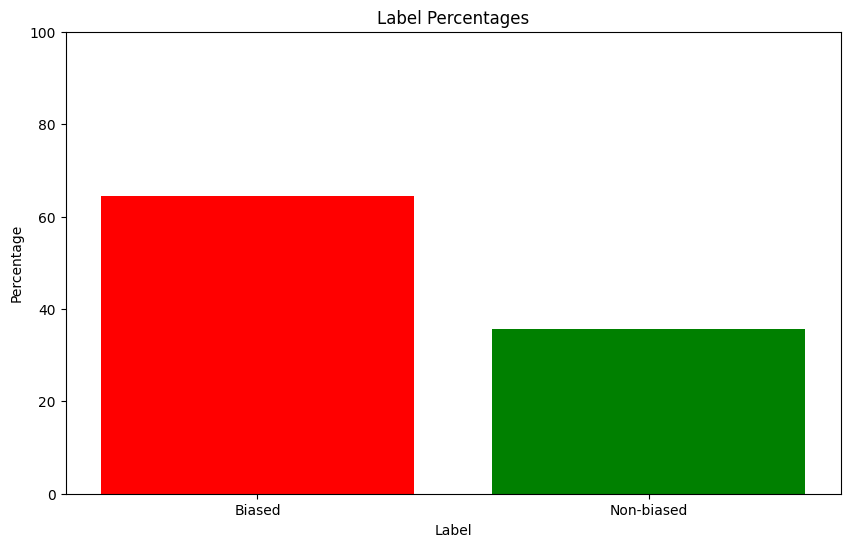

In [18]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Classes in Bar Graph:")
print("=============================================\n")

# Assuming sentiment_counts is a Pandas Series containing counts
bais_counts = df['Label'].value_counts()

# Calculate percentages
total_instances = bais_counts.sum()
percentages = (bais_counts / total_instances) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
colors = {'Non-biased': 'green', 'Biased': 'red'}

# Create a bar graph with colored bars
plt.bar(bais_counts.index, percentages, color=[colors[sent] for sent in bais_counts.index])

# Add labels and a title
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.title('Label Percentages')

# Set the y-axis limit to 100
plt.ylim(0, 100)

# Show the bar graph
plt.show()


In [19]:
# User input for prediction
def get_user_input():
    text = input("Enter text for bias detection: ")
    preprocessed_text = data_preprocessing(text)
    label, score = classify_bias(preprocessed_text)
    return label, score

# Get prediction for user input
label, score = get_user_input()
print(f"Predicted Label: {label}, Score: {score}")

Enter text for bias detection: made remarkable contributions research
Predicted Label: Biased, Score: 0.9272316098213196


In [62]:
def custom_classification(x):
    classi_out = classify(x)
    return classi_out[0]['label'], classi_out[0]['score']

def custom_recognizer(x):
    biased_words = recognizer(x)
    biased_words_list = []
    for id in range(0, len(biased_words)):
        biased_words_list.append(biased_words[id]['entity'])
    return ", ".join(biased_words_list)

def custom_debiasing(x):
    suggestions = run(x)
    classi_out = classify(x)
    if suggestions == None:
      if classi_out[0]['label'] == "Non-biased":
        return None, classi_out[0]['label']
      else:
        return None, "couldnt find another word"
    else:
      all_suggestions = []
      for sent in suggestions[0:3]:
        all_suggestions.append(sent['Sentence'])
      sujested_words = None
      suggestions_list = "\n\n".join(all_suggestions)
      for suggestion, originaL_word in zip(suggestions_list.split(), x.split()):
        if suggestion != originaL_word:
          sujested_word = suggestion
      return "\n\n".join(all_suggestions), "Replaced"



In [ ]:
# running Dbias classfication to classify whether a news article is biased or not
df[['state', 'probability']] = df['Data'].apply(lambda x: custom_classification(x)).to_list()


In [64]:
# running Dbias recognition to recognize biased words/phrases
df['biased words'] = df['Data'].apply(lambda x: custom_recognizer(x))


In [65]:
df[['suggestion',"status"]] = df['Data'].apply(lambda x: custom_debiasing(x)).to_list()

The Sentence is Non biased
The Sentence is biased but the model failed to pick up portion of bias
The Sentence is biased but the model failed to pick up portion of bias
The Sentence is biased but the model failed to pick up portion of bias
The Sentence is Non biased
The Sentence is Non biased
The Sentence is biased but the model failed to pick up portion of bias
The Sentence is Non biased
The Sentence is biased but the model failed to pick up portion of bias
The Sentence is biased but the model failed to pick up portion of bias
We were able to reduce the amount of bias!
The Sentence is biased but the model failed to pick up portion of bias
The Sentence is Non biased
The Sentence is biased but the model failed to pick up portion of bias
We were able to reduce the amount of bias!
The Sentence is biased but the model failed to pick up portion of bias
The Sentence is biased but the model failed to pick up portion of bias
The Sentence is biased but the model failed to pick up portion of bia

In [67]:
df = df.drop(["Unnamed: 0","stemmed", "lemmatized","Score","Label"], axis = 1)

In [68]:
df

,Data,state,probability,biased words,suggestion,status
0,arthur world leading professor arthur world le...,Non-biased,0.565209,,None,Non-biased
1,made significant contributions theory practice...,Biased,0.812623,,None,couldnt find another word
2,published papers top journals conferences rece...,Biased,0.61231,,None,couldnt find another word
3,also highly influential educator mentor superv...,Biased,0.782533,,None,couldnt find another word
4,essay highlight main achievements impacts arth...,Non-biased,0.554498,,None,Non-biased
5,machine learning machine learning core area ar...,Non-biased,0.63065,,None,Non-biased
6,one pioneers deep learning branch machine lear...,Biased,0.957006,,None,couldnt find another word
7,developed earliest influential models deep lea...,Non-biased,0.670643,,None,Non-biased
8,also proposed novel algorithms training optimi...,Biased,0.818097,,None,couldnt find another word
9,work deep learning inspired enabled many break...,Biased,0.994431,,None,couldnt find another word
